<a href="https://colab.research.google.com/github/Naomiweinberger/Hate-Speech/blob/main/Synthesizes_dataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries** 

In [1]:
!pip install tweet-preprocessor 
!pip install tweet-preprocessor 

In [2]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, FreqDist
stemmer = nltk.SnowballStemmer("english")
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import ngrams, FreqDist
nltk.download('punkt')
import string

from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from xgboost import XGBClassifier as xbg 
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")
import preprocessor as p
from collections import Counter
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weinb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weinb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weinb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model Function 

In [5]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)    
    cnf_matrix_test = confusion_matrix(y_test,  y_pred_test)

    print('Confusion Matrix for Test Set:\n', cnf_matrix_test)
   
    cnf_matrix_train = confusion_matrix(y_train,  y_pred_train)
    print('Confusion Matrix for Train Set:\n', cnf_matrix_train)


    accuracy = accuracy_score(y_pred_train, y_pred_test)
    print('Classification Report for Test Set:\n',classification_report(y_test , y_pred_test))
    print('Classification Report for Train Set:\n',classification_report(y_train, y_pred_train))
    return model 

EDA Data

In [6]:
hatespeech_df = pd.read_csv("labeled_data.csv")
hatespeech_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
hatespeech_df2=pd.read_csv("train_E6oV3lV.csv")
hatespeech_df2.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
hatespeech_df_1=hatespeech_df[['class','tweet']]

In [9]:
hatespeech_df2['class']=hatespeech_df2['label']

In [10]:
hatespeech_df2['class'] = hatespeech_df2['class'].replace(['0'],'2')

In [11]:
df_2 = pd.DataFrame(hatespeech_df2, columns= ['class','tweet'])
df_2['class'] = df_2['class'].replace([1,0],[0,2])

In [12]:
df_2

,class,tweet
0,2,@user when a father is dysfunctional and is s...
1,2,@user @user thanks for #lyft credit i can't us...
2,2,bihday your majesty
3,2,#model i love u take with u all the time in ...
4,2,factsguide: society now #motivation
...,...,...
31957,2,ate @user isz that youuu?ðððððð...
31958,2,to see nina turner on the airwaves trying to...
31959,2,listening to sad songs on a monday morning otw...
31960,0,"@user #sikh #temple vandalised in in #calgary,..."


In [13]:
hatespeech=pd.concat([hatespeech_df_1, df_2])
hatespeech.shape

(56745, 2)

<AxesSubplot:xlabel='class', ylabel='count'>

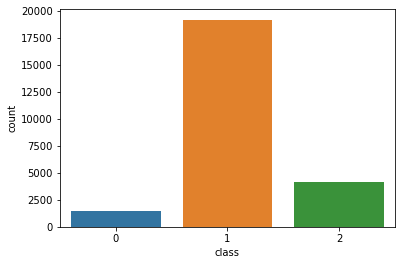

In [14]:
sns.countplot('class',data=hatespeech_df)

<AxesSubplot:xlabel='class', ylabel='count'>

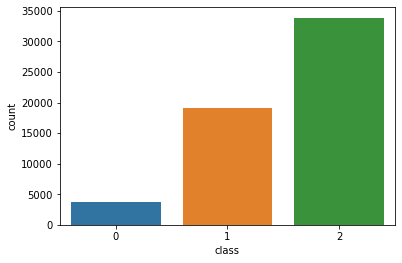

In [15]:
sns.countplot('class',data=hatespeech)

In [16]:
hatespeech_df_1

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [17]:
X=hatespeech['tweet']
y=hatespeech['class']

**Data**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

**Clean Text/Tokenike Test**

In [19]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub("@[A-Za-z0-9_]+", " ", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\w\s]', '', (text))
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [20]:
X_train=X_train.apply(clean_text)
X_train.head()

12726    man im tryin take intox charli sheen level tod...
21827          nicca sangin dey partna witout grammi award
17082    rt   bitch ass nigga claim yo homi get dirt  b...
6460                   lmao ur dad rais u bitch made nigga
8482     prayfororlando ðinstagram ð   toptag  toptag n...
Name: tweet, dtype: object

In [21]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
                       strip_accents = 'unicode',
                       stop_words = 'english',
                       lowercase = True,
                       token_pattern = r'\b[a-zA-Z]{3,}\b', # keeps words of 3 or more characters
                       max_df = 0.5,
                       min_df = 10)

In [22]:
X_test=X_test.apply(clean_text)
X_test.head()

14372            day   season  premier cant wait   thefost
6207                                pick sc take us nip cr
5090                                  go jerk lolli faggot
12005    dream fm inshot girl cute summer blur sun   fu...
4072       fuckin mom bitch like aint even payin dylan ...
Name: tweet, dtype: object

In [23]:
X_train_vec = tf_vectorizer.fit_transform(X_train)
X_test_vec = tf_vectorizer.transform(X_test)

In [24]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in \
                                     w_tokenizer.tokenize((text))]

**HATE**

**BASELINE MODELS**

In [25]:
X_train_vec = tf_vectorizer.fit_transform(X_train)
X_test_vec = tf_vectorizer.transform(X_test)

In [26]:
X_train=X_train_vec.todense()
X_test=X_test_vec.todense()

In [ ]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[ 467   72   46]
 [2757  981  100]
 [2124  730 2000]]


0.37167187668427293

In [ ]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
y_pred = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 228  185  172]
 [ 151 3479  208]
 [ 222  276 4356]]


0.8691387301929503

In [ ]:
classifier_kn = KNeighborsClassifier()
classifier_kn.fit(X_train, y_train)
y_pred = classifier_kn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 189  165  380]
 [  88 3361  389]
 [  53  170 6554]]


0.8902987047316944

In [ ]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
model_pipe_rf = IMBPipeline(steps=[
    ('smote', SMOTE()),
    ('rf', RandomForestClassifier())
])
pipe_grid_rf = {'rf__n_estimators': [4, 6, 9], 
              'rf__max_features': ['log2', 'sqrt','auto'],
              'rf__criterion': ['entropy', 'gini'], 
              'rf__max_depth': [2, 3, 5, 10], 
              'rf__min_samples_split': [2, 3, 5],
              'rf__min_samples_leaf': [1,5,8] }

gs_pipe_rf = GridSearchCV(estimator=model_pipe_rf, param_grid=pipe_grid_rf,verbose=2)
run_model(gs_pipe_rf, X_train, X_test, y_train, y_test)

In [ ]:
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)
y_pred = classifier_xg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 120  138  476]
 [  57 3361  420]
 [   9   37 6731]]


0.8998149616706318

In [3]:
pickle.dump(classifier_rf,open('model.pkl','wb'))

NameError: name 'classifier_rf' is not defined

In [ ]:
classifier_rf.predict()

In [ ]:
def make_prediction(model,tweet,label)
    pred=model.predict(((var,skew,kurt,entropy)))
    if pred[0]==0:
        return "Normal"
    elif pred[1]==1:
        return "Offensive"
    else:
        return "hateful"